In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [67]:
df=pd.read_csv("/content/StudentPerformanceFactors.csv")

In [68]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [69]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

# **Simple Linear Regression**
### Based only on the study hours

In [71]:
X1=df[['Hours_Studied']]
Y1 =df['Exam_Score']

In [72]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)


In [73]:
# Initialize and train the Linear Regression model
simple_linear_model = LinearRegression()
simple_linear_model.fit(X1_train, y1_train)
y1_pred = simple_linear_model.predict(X1_test)

In [74]:
# Calculate Mean Squared Error (MSE) and R-squared (R²)
mse1 = mean_squared_error(y1_test, y1_pred)
r21 = r2_score(y1_test, y1_pred)

print("Mean Squared Error (MSE):", mse1)
print("R-squared (R²):", r21)
print("Coefficient (Slope):", simple_linear_model.coef_[0])
print("Intercept:", simple_linear_model.intercept_)

Mean Squared Error (MSE): 10.85592128879332
R-squared (R²): 0.2319868674542106
Coefficient (Slope): 0.285668744443087
Intercept: 61.51116746904424


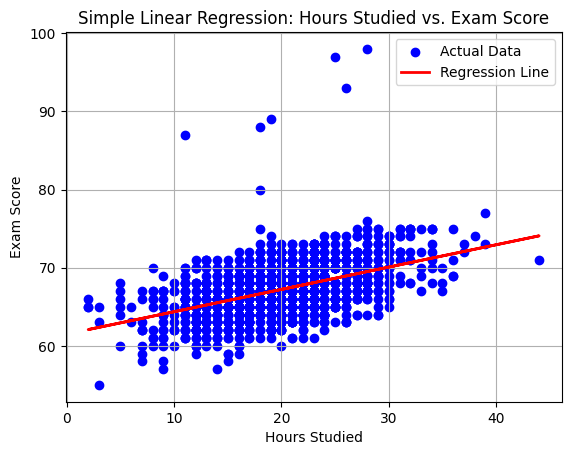

In [75]:
import matplotlib.pyplot as plt

# Plot the actual data points
plt.scatter(X1_test, y1_test, color='blue', label='Actual Data')

# Plot the regression line
plt.plot(X1_test, y1_pred, color='red', linewidth=2, label='Regression Line')

# Add labels and title
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Simple Linear Regression: Hours Studied vs. Exam Score')
plt.legend()
plt.grid(True)
plt.show()

# **Multi linear regression**

In [76]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [77]:
x2=df.drop(['Exam_Score', 'Parental_Education_Level', 'Distance_from_Home', 'Motivation_Level',	'Gender', 'School_Type', 'Peer_Influence', 'Physical_Activity', 'Sleep_Hours', 'Previous_Scores', 'Family_Income'], axis=1)
y2=df['Exam_Score']

In [78]:
x2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Internet_Access             6607 non-null   object
 6   Tutoring_Sessions           6607 non-null   int64 
 7   Teacher_Quality             6529 non-null   object
 8   Learning_Disabilities       6607 non-null   object
dtypes: int64(3), object(6)
memory usage: 464.7+ KB


In [79]:
x2.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Internet_Access,Tutoring_Sessions,Teacher_Quality,Learning_Disabilities
0,23,84,Low,High,No,Yes,0,Medium,No
1,19,64,Low,Medium,No,Yes,2,Medium,No
2,24,98,Medium,Medium,Yes,Yes,2,Medium,No
3,29,89,Low,Medium,Yes,Yes,1,Medium,No
4,19,92,Medium,Medium,Yes,Yes,3,High,No


In [80]:
x2.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Internet_Access,0
Tutoring_Sessions,0
Teacher_Quality,78
Learning_Disabilities,0


In [81]:
y2.isnull().sum()

np.int64(0)

In [82]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Separate numerical and categorical features
numerical_features = []
categorical_features = []

for col in x2.columns:
    if pd.api.types.is_numeric_dtype(x2[col]):
        numerical_features.append(col)
    else:
        categorical_features.append(col)

# --- Normalize numerical features ---
scaler = MinMaxScaler()
x2[numerical_features] = scaler.fit_transform(x2[numerical_features])

# --- Encode categorical features ---
label_encoder = LabelEncoder()
for col in categorical_features:
    x2[col] = label_encoder.fit_transform(x2[col])

# --- Encode the target (y2) ---
y2_processed = scaler.fit_transform(y2.values.reshape(-1, 1))

print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)
print("Transformed x2 head:\n", x2.head())
print("Encoded y2:\n", y2_processed[:10])


Numerical Features: ['Hours_Studied', 'Attendance', 'Tutoring_Sessions']
Categorical Features: ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Internet_Access', 'Teacher_Quality', 'Learning_Disabilities']
Transformed x2 head:
    Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0       0.511628       0.600                     1                    0   
1       0.418605       0.100                     1                    2   
2       0.534884       0.950                     2                    2   
3       0.651163       0.725                     1                    2   
4       0.418605       0.800                     2                    2   

   Extracurricular_Activities  Internet_Access  Tutoring_Sessions  \
0                           0                1              0.000   
1                           0                1              0.250   
2                           1                1              0.250   
3              

In [83]:


# --- Split data into train & test ---
X_train, X_test, y_train, y_test = train_test_split(
    x2, y2_processed, test_size=0.2, random_state=42
)

# --- Create and train Linear Regression model ---
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# --- Predictions ---
y_pred = lin_reg.predict(X_test)

# --- Evaluation ---
mse2 = mean_squared_error(y_test, y_pred)
r22 = r2_score(y_test, y_pred)

print("Intercept:", lin_reg.intercept_)
print("Coefficients:", lin_reg.coef_)
print("Mean Squared Error:", mse2)
print("R² Score:", r22)


Intercept: [0.04979779]
Coefficients: [[ 0.27066363  0.17163628 -0.00965063 -0.00841321  0.01249674  0.02058648
   0.0866085  -0.00583065 -0.01798956]]
Mean Squared Error: 0.0024504168674606987
R² Score: 0.6331761226247247


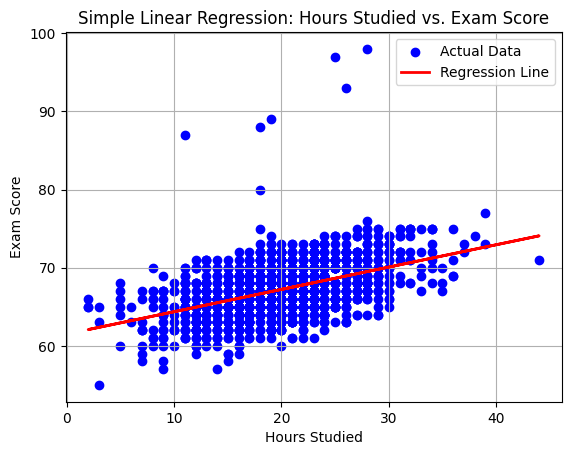

In [84]:

import matplotlib.pyplot as plt

# Plot the actual data points
plt.scatter(X1_test, y1_test, color='blue', label='Actual Data')

# Plot the regression line
plt.plot(X1_test, y1_pred, color='red', linewidth=2, label='Regression Line')

# Add labels and title
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Simple Linear Regression: Hours Studied vs. Exam Score')
plt.legend()
plt.grid(True)
plt.show()

# **Poly regression**

In [85]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# --- Split data ---
X_train, X_test, y_train, y_test = train_test_split(
    x2, y2_processed, test_size=0.2, random_state=42
)

# --- Polynomial transformation ---
poly = PolynomialFeatures(degree=2)   # try 2, 3, 4 ...
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# --- Train model ---
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# --- Predictions ---
y_pred = poly_reg.predict(X_test_poly)

# --- Evaluation ---
mse3 = mean_squared_error(y_test, y_pred)
r23 = r2_score(y_test, y_pred)

print("Degree:", poly.degree)
print("Intercept:", poly_reg.intercept_)
print("Coefficients shape:", poly_reg.coef_.shape)
print("Mean Squared Error:", mse3)
print("R² Score:", r23)


Degree: 2
Intercept: [0.06971463]
Coefficients shape: (1, 55)
Mean Squared Error: 0.0021170944375200245
R² Score: 0.68307401052724


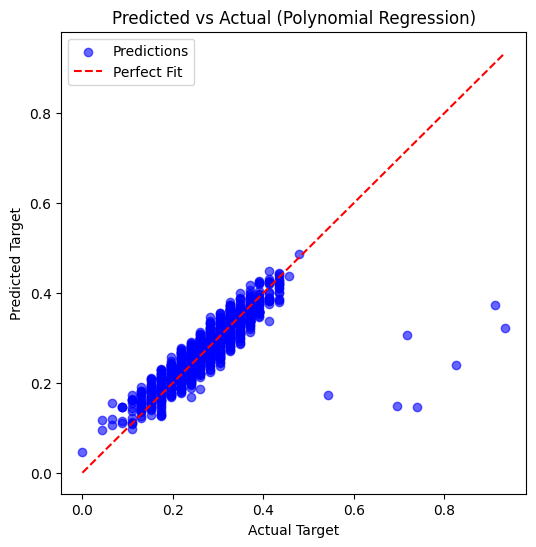

In [86]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue", label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color="red", linestyle="--", label="Perfect Fit")

plt.xlabel("Actual Target")
plt.ylabel("Predicted Target")
plt.title("Predicted vs Actual (Polynomial Regression)")
plt.legend()
plt.show()


Model Performance Comparison:

                           Model        MSE  R² Score
0       Simple Linear Regression  10.855921  0.231987
1     Multiple Linear Regression   0.002450  0.633176
2  Polynomial Regression (deg=2)   0.002117  0.683074


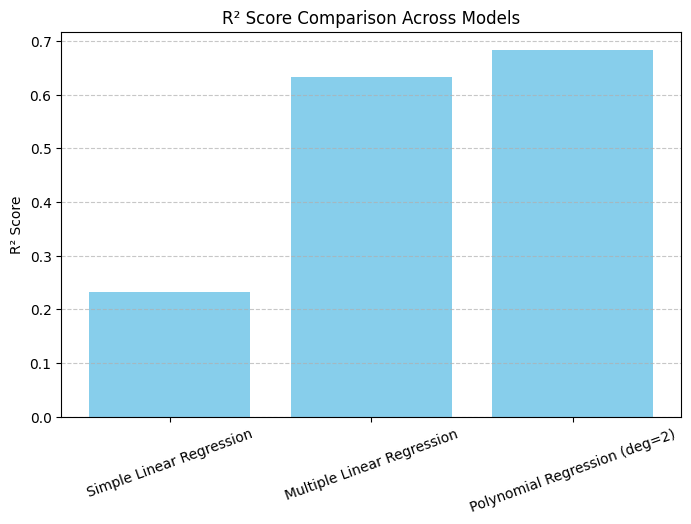

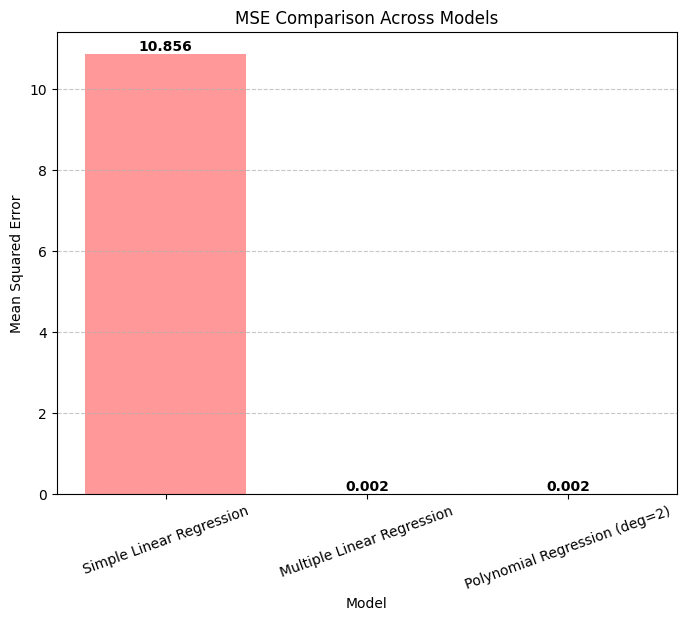

In [91]:


# --- Collect metrics from each model ---
results = {
    "Model": ["Simple Linear Regression", "Multiple Linear Regression", "Polynomial Regression (deg=2)"],
    "MSE": [mse1, mse2, mse3],   # replace with your stored mse values
    "R² Score": [r21, r22, r23]  # replace with your stored r² values
}

# --- Create DataFrame for comparison ---
results_df = pd.DataFrame(results)

print("Model Performance Comparison:\n")
print(results_df)

# --- Optional: Visualization ---
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(results_df["Model"], results_df["R² Score"], color="skyblue")
plt.title("R² Score Comparison Across Models")
plt.ylabel("R² Score")
plt.xticks(rotation=20)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
# --- Redraw MSE Comparison for All Models ---
plt.figure(figsize=(8,6))
bars = plt.bar(results_df["Model"], results_df["MSE"], color=["#ff9999","#66b3ff","#99ff99"])

# Add values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3),
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("MSE Comparison Across Models")
plt.ylabel("Mean Squared Error")
plt.xlabel("Model")
plt.xticks(rotation=20)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

